In [18]:
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
import matplotlib_inline as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
labels_test = pd.read_csv("Rose.v1i.tensorflow/test/_annotations.csv")

labels_train = pd.read_csv("Rose.v1i.tensorflow/train/_annotations.csv")

labels_val = pd.read_csv("Rose.v1i.tensorflow/valid/_annotations.csv")


In [20]:
df_labels_test = pd.DataFrame(labels_test)
df_labels_test

,filename,width,height,class,xmin,ymin,xmax,ymax
0,3495455675_29dacd8662_c_jpg.rf.0b35ce22382bca7...,128,128,rose,2,13,82,112
1,4393453463_356b3a63c2_c_jpg.rf.08fe8608ef950fb...,128,128,rose,0,0,128,128
2,29996866615_6b611296bb_c_jpg.rf.031e7fa099b68b...,128,128,rose,0,0,128,128
3,13993696698_2e4c759521_c_jpg.rf.106e219f2b5e08...,128,128,iris,0,0,128,128
4,15052767589_e5655ab9a8_c_jpg.rf.09ba504c8dd706...,128,128,rose,0,0,128,109
...,...,...,...,...,...,...,...,...
454,158565233_0b329a6ae3_c_jpg.rf.fcb23735ad811ebb...,128,128,tulip,73,101,115,128
455,5616091157_bb7e39aa1c_c_jpg.rf.fec9bcd493dffc8...,128,128,rose,0,0,128,128
456,3045954461_54dd378b1d_c_jpg.rf.fd93554839aff3b...,128,128,rose,28,25,103,128
457,26471888213_2f8097ee23_c_jpg.rf.fc16eeecc62c97...,128,128,rose,0,0,128,128


In [21]:
df_labels_train = pd.DataFrame(labels_train)
df_labels_train

,filename,width,height,class,xmin,ymin,xmax,ymax
0,29107399967_6fe38920fa_c_jpg.rf.784fe350a924e0...,128,128,iris,0,0,128,128
1,35538488514_fd7f6c1b2a_c_jpg.rf.78021ad41f1b4b...,128,128,rose,0,0,128,128
2,2999848462_56d3c08a46_c_jpg.rf.7b7d37d0b893a4f...,128,128,rose,0,0,125,128
3,2480337460_c298544b81_c_jpg.rf.7a232f1841db800...,128,128,rose,0,0,128,128
4,8705175629_3ca610d337_c_jpg.rf.7821a8486226d82...,128,128,rose,37,0,128,128
...,...,...,...,...,...,...,...,...
2986,30731440286_6a37038d22_c_jpg.rf.77c7eb13cd2a30...,128,128,rose,0,44,128,128
2987,30946435951_1b0e546681_c_jpg.rf.77e24a59fe9d4f...,128,128,rose,0,8,128,128
2988,3691662110_f65854b859_c_jpg.rf.77250e55770a635...,128,128,tulip,15,0,91,60
2989,14475353248_19071e3827_c_jpg.rf.768c5b06311349...,128,128,rose,0,0,73,119


In [22]:
df_labels_val = pd.DataFrame(labels_val)
df_labels_val

,filename,width,height,class,xmin,ymin,xmax,ymax
0,8013894382_f6b339e9c0_c_jpg.rf.00ee7e8ba2f14d1...,128,128,rose,28,0,128,128
1,4987470688_32d7d68d29_c_jpg.rf.0201ef5d3ca26c7...,128,128,rose,0,0,128,128
2,8147996556_d176118a57_c_jpg.rf.02be71af9c670de...,128,128,rose,0,0,128,128
3,15537917111_dd6a4e41d1_c_jpg.rf.04b45f80a98daf...,128,128,rose,0,0,128,128
4,136727699_7dcc3b9976_c_jpg.rf.0321b999e8a54289...,128,128,tulip,15,0,103,115
...,...,...,...,...,...,...,...,...
398,3537389234_58fd548cd4_c_jpg.rf.fb4eda3388445a5...,128,128,tulip,0,0,70,128
399,8198375518_a49db811fd_c_jpg.rf.fea04d400ded20c...,128,128,rose,10,0,106,97
400,17948299355_2161a031db_c_jpg.rf.f9262cbb61918b...,128,128,iris,18,0,128,128
401,9246201815_6b38ea4808_c_jpg.rf.fdda8ecd190c76d...,128,128,rose,0,0,88,128


In [23]:
combined_df = pd.concat([df_labels_test, df_labels_train])

combined_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,3495455675_29dacd8662_c_jpg.rf.0b35ce22382bca7...,128,128,rose,2,13,82,112
1,4393453463_356b3a63c2_c_jpg.rf.08fe8608ef950fb...,128,128,rose,0,0,128,128
2,29996866615_6b611296bb_c_jpg.rf.031e7fa099b68b...,128,128,rose,0,0,128,128
3,13993696698_2e4c759521_c_jpg.rf.106e219f2b5e08...,128,128,iris,0,0,128,128
4,15052767589_e5655ab9a8_c_jpg.rf.09ba504c8dd706...,128,128,rose,0,0,128,109
...,...,...,...,...,...,...,...,...
2986,30731440286_6a37038d22_c_jpg.rf.77c7eb13cd2a30...,128,128,rose,0,44,128,128
2987,30946435951_1b0e546681_c_jpg.rf.77e24a59fe9d4f...,128,128,rose,0,8,128,128
2988,3691662110_f65854b859_c_jpg.rf.77250e55770a635...,128,128,tulip,15,0,91,60
2989,14475353248_19071e3827_c_jpg.rf.768c5b06311349...,128,128,rose,0,0,73,119


In [24]:
combined_df = pd.concat([combined_df, df_labels_val])

combined_df


,filename,width,height,class,xmin,ymin,xmax,ymax
0,3495455675_29dacd8662_c_jpg.rf.0b35ce22382bca7...,128,128,rose,2,13,82,112
1,4393453463_356b3a63c2_c_jpg.rf.08fe8608ef950fb...,128,128,rose,0,0,128,128
2,29996866615_6b611296bb_c_jpg.rf.031e7fa099b68b...,128,128,rose,0,0,128,128
3,13993696698_2e4c759521_c_jpg.rf.106e219f2b5e08...,128,128,iris,0,0,128,128
4,15052767589_e5655ab9a8_c_jpg.rf.09ba504c8dd706...,128,128,rose,0,0,128,109
...,...,...,...,...,...,...,...,...
398,3537389234_58fd548cd4_c_jpg.rf.fb4eda3388445a5...,128,128,tulip,0,0,70,128
399,8198375518_a49db811fd_c_jpg.rf.fea04d400ded20c...,128,128,rose,10,0,106,97
400,17948299355_2161a031db_c_jpg.rf.f9262cbb61918b...,128,128,iris,18,0,128,128
401,9246201815_6b38ea4808_c_jpg.rf.fdda8ecd190c76d...,128,128,rose,0,0,88,128


In [25]:
import cv2
import pandas as pd
import os
data_dirs = ["Rose.v1i.tensorflow/train/", "Rose.v1i.tensorflow/test/", "Rose.v1i.tensorflow/valid/"]

# Resimleri ve verileri depolamak için boş bir liste tanımlayın
images1 = []

for data_dir in data_dirs:
    for index, row in combined_df.iterrows():
        # Görsel dosya yolunu oluşturun
        image_path = os.path.join(data_dir, row["filename"])
        
        # OpenCV ile görseli yükleyin
        image = cv2.imread(image_path)
        
        # Görseli ve diğer bilgileri listeye ekleyin
        images1.append((image, row["xmin"], row["ymin"], row["xmax"], row["ymax"], row["class"]))


images1


[(None, 2, 13, 82, 112, 'rose'),
 (None, 0, 0, 128, 128, 'rose'),
 (None, 0, 0, 128, 128, 'rose'),
 (None, 0, 0, 128, 128, 'iris'),
 (None, 0, 0, 128, 109, 'rose'),
 (None, 0, 0, 128, 128, 'iris'),
 (None, 0, 0, 128, 128, 'iris'),
 (None, 4, 7, 128, 128, 'rose'),
 (None, 54, 64, 108, 128, 'tulip'),
 (None, 0, 27, 28, 124, 'tulip'),
 (None, 0, 0, 75, 128, 'tulip'),
 (None, 0, 0, 128, 128, 'rose'),
 (None, 0, 0, 128, 128, 'iris'),
 (None, 0, 0, 102, 128, 'rose'),
 (None, 0, 0, 128, 128, 'rose'),
 (None, 0, 34, 36, 91, 'rose'),
 (None, 6, 0, 128, 63, 'rose'),
 (None, 38, 79, 128, 128, 'rose'),
 (None, 90, 39, 128, 82, 'rose'),
 (None, 0, 0, 66, 128, 'tulip'),
 (None, 0, 9, 86, 128, 'rose'),
 (None, 77, 24, 128, 128, 'rose'),
 (None, 0, 0, 128, 128, 'iris'),
 (None, 7, 2, 108, 128, 'rose'),
 (None, 10, 0, 62, 113, 'tulip'),
 (None, 101, 79, 128, 128, 'tulip'),
 (None, 89, 15, 128, 110, 'tulip'),
 (None, 0, 0, 128, 128, 'rose'),
 (None, 0, 0, 128, 128, 'rose'),
 (None, 0, 0, 128, 128, 'rose

In [26]:
import matplotlib.pyplot as plt
import cv2


for image_data in images1:
  # Görüntü yoksa geç
  if image_data[0] is None:
    print("0")
    continue

  # Değerleri ayıkla
  image = image_data[0]
  xmin, ymin, xmax, ymax, class_label = image_data[1:]

  # Sınırlayıcı kutu çiz
  cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)




0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [27]:
import cv2
import numpy as np

images = []
labels = []

data_dirs = ["Rose.v1i.tensorflow/train/", "Rose.v1i.tensorflow/test/", "Rose.v1i.tensorflow/valid/"]

for data_dir in data_dirs:
    for index, row in combined_df.iterrows():
        image_path = os.path.join(data_dir, row["filename"])
        
        try:
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append(image)
                
                # Etiketleri al (assuming this part works correctly)
                class_label = row["class"]
                xmin = row["xmin"]
                ymin = row["ymin"]
                xmax = row["xmax"]
                ymax = row["ymax"]
                labels.append([xmin, ymin, xmax, ymax, class_label])
        except (FileNotFoundError, cv2.error):
            # Log an error message or handle the exception here
            print(f"Error reading image: {image_path}")
            pass  # Skip to the next image in the loop

# Listeleri Numpy dizilerine dönüştür
images = np.array(images)
labels = np.array(labels)


In [28]:
# Etiketlerinizi sayısal formata dönüştürmek için bir kodlama yapalım
label_encoding = {'rose': 0, 'iris': 1, 'tulip': 2}

# Etiketlerinizi sayısal forma dönüştürmek için bir dönüşüm fonksiyonu oluşturalım
def encode_labels(label):
    return label_encoding[label]

# Etiketlerinizi sayısal forma dönüştürelim
labels_numeric = np.array([encode_labels(label) for label in labels[:, 4]])



In [29]:
import numpy as np


train_labels = np.array(labels)
test_labels = np.array(images)

train_labels = train_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)



In [30]:
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (3853, 128, 128, 3)
Labels shape: (3853, 5)


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


img_height = 128
img_width = 128
num_classes = 3 # Toplam sınıf sayısı
image_path = os.path.join(data_dir, row["filename"])


# Modeli oluştur
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])


# Modeli derle
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Örnek olarak veri setinizi %80 eğitim, %30 test olarak bölelim
train_images_normalized, test_images_normalized, train_labels, test_labels = train_test_split(images, labels_numeric, test_size=0.3, random_state=30)

# Modeli eğit
model.fit(train_images_normalized, train_labels, epochs=4, validation_data=(test_images_normalized, test_labels))

Epoch 1/4
85/85 [==============================] - 8s 83ms/step - loss: 1.9871 - accuracy: 0.5803 - val_loss: 0.6258 - val_accuracy: 0.7137
Epoch 2/4
85/85 [==============================] - 6s 75ms/step - loss: 0.6135 - accuracy: 0.7178 - val_loss: 0.5325 - val_accuracy: 0.7682
Epoch 3/4
85/85 [==============================] - 7s 78ms/step - loss: 0.5196 - accuracy: 0.7720 - val_loss: 0.4665 - val_accuracy: 0.8080
Epoch 4/4
85/85 [==============================] - 7s 83ms/step - loss: 0.4575 - accuracy: 0.8053 - val_loss: 0.4772 - val_accuracy: 0.7933


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Tahminleri yap
predictions = model.predict(test_images_normalized)
predicted_classes = np.argmax(predictions, axis=1)

# Doğruluk (Accuracy)
accuracy = accuracy_score(test_labels, predicted_classes)
print("Accuracy:", accuracy)

# Hassasiyet (Precision)
precision = precision_score(test_labels, predicted_classes, average='weighted')
print("Precision:", precision)

# Duyarlılık (Recall)
recall = recall_score(test_labels, predicted_classes, average='weighted')
print("Recall:", recall)

# F1-Score
f1 = f1_score(test_labels, predicted_classes, average='weighted')
print("F1-Score:", f1)

# Sınıf bazında doğruluk (Class-wise Accuracy) ve diğer metrikler
print(classification_report(test_labels, predicted_classes))


37/37 [==============================] - 1s 24ms/step
Accuracy: 0.7932525951557093
Precision: 0.8210476248330364
Recall: 0.7932525951557093
F1-Score: 0.7842200172219461
              precision    recall  f1-score   support

           0       0.73      0.95      0.82       579
           1       0.94      0.85      0.89       148
           2       0.91      0.56      0.69       429

    accuracy                           0.79      1156
   macro avg       0.86      0.79      0.80      1156
weighted avg       0.82      0.79      0.78      1156



1/1 [==============================] - 0s 21ms/step


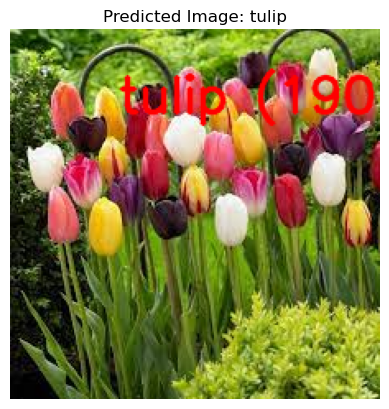

Accuracy for class rose : 99.85065460205078 %
Accuracy for class iris : -293.9451217651367 %
Accuracy for class tulip : 190.09052515029907 %
 tulip (190.09% accuracy)


In [33]:
import cv2
import numpy as np

# Giriş görüntüsünü yükleme
input_image_path = "5.jpeg"
input_image = cv2.imread(input_image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Giriş görüntüsünü BGR'den RGB'ye dönüştürme

# Sayısal formattaki etiketlerin gerçek etiketlere dönüştürülmesi için ters etiket kodlaması sözlüğünü oluşturalım
label_encoding_reverse = {v: k for k, v in label_encoding.items()}

# Giriş görüntüsünü modele uygun formata dönüştürme
resized_input_image = cv2.resize(input_image, (img_height, img_width))  # Modelin beklentisi olan boyutlara yeniden boyutlandırma
processed_input_image = np.expand_dims(resized_input_image, axis=0)  # Giriş görüntüsünü batch boyutu ekleyerek modele uygun hale getirme

# Tahminde bulunma
predictions = model.predict(processed_input_image)

# Tahminleri inceleme
predicted_class_index = np.argmax(predictions)  # En yüksek olasılığa sahip sınıfın indeksini bulma
predicted_class_label = label_encoding_reverse[predicted_class_index]  # Tahmin edilen sınıfın etiketini bulma

# Tahmin edilen sınıfın doğruluk oranını hesaplama
predicted_class_accuracy = predictions[0][predicted_class_index] * 100

# Tahmin edilen sınıfı görüntünün üzerine yazdırma
font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 50)  # Yazının başlangıç koordinatları
font_scale = 1
color = (255, 0, 0)  # Yazı rengi (RGB formatında)
thickness = 2  # Yazı kalınlığı

# Görüntüye metni ekleme (sınıf etiketi ve doğruluk oranı)
text = " {} ({:.2f}% accuracy)".format(predicted_class_label, predicted_class_accuracy)
cv2.putText(input_image, text, org, font, font_scale, color, thickness, cv2.LINE_AA)

import matplotlib.pyplot as plt

# Görüntüyü görselleştirme
plt.imshow(input_image)
plt.title("Predicted Image: " + predicted_class_label)
plt.axis('off')  # Eksenleri kapatma
plt.show()

# Tahminlerin doğruluğunu hesaplama
for label, index in label_encoding.items():
    accuracy = predictions[0][index] * 100
    print("Accuracy for class", label, ":", accuracy, "%")

print(text)



In [34]:
model.save("model2.h5")

C:\Users\GorkemCet\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
import tensorflow as tf

# Mevcut TensorFlow modelinizi yükleyin
model = tf.keras.models.load_model('model2.h5')

# TensorFlow Lite Converter ile modeli dönüştürün
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# TFLite modelini bir dosyaya kaydedin
with open('model_unquant.tflite', 'wb') as f:
    f.write(tflite_model)


#TensorflowLite mobil uygulama için gerekli


INFO:tensorflow:Assets written to: C:\Users\GORKEM~1\AppData\Local\Temp\tmp8vez3nis\assets


INFO:tensorflow:Assets written to: C:\Users\GORKEM~1\AppData\Local\Temp\tmp8vez3nis\assets
